# [**Analyse factorielle (avec rotation) pour visualiser des motifs**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_5_decomposition/plot_varimax_fa.ipynb)<br/>([*Factor Analysis (with rotation) to visualize patterns*](https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html))

En examinant l'ensemble de données Iris, nous voyons que la longueur des sépales, la longueur des pétales et la largeur des pétales sont fortement corrélées. La largeur des sépales est moins redondante. Les techniques de décomposition de matrice peuvent découvrir ces motifs latents. L'application de rotations aux composantes résultantes n'améliore pas intrinsèquement la valeur prédictive de l'espace latent dérivé, mais peut aider à visualiser leur structure. Ici, par exemple, la rotation varimax, qui est trouvée en maximisant les variances au carré des poids, trouve une structure où la deuxième composante ne charge positivement que sur la largeur des sépales.

In [1]:
# Authors: Jona Sassenhagen
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

Chargement des données Iris

In [2]:
data = load_iris()
X = StandardScaler().fit_transform(data["data"])
feature_names = data["feature_names"]

Tracer la covariance des caractéristiques de l'Iris

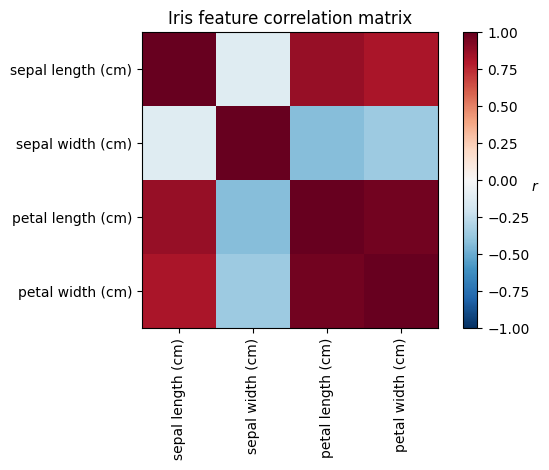

In [3]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

Exécuter une analyse factorielle avec rotation Varimax



 PCA :

[[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]


 Unrotated FA :

[[ 0.88096009 -0.4472869 ]
 [-0.41691605 -0.55390036]
 [ 0.99918858  0.01915283]
 [ 0.96228895  0.05840206]]


 Varimax FA :

[[ 0.98633022 -0.05752333]
 [-0.16052385 -0.67443065]
 [ 0.90809432  0.41726413]
 [ 0.85857475  0.43847489]]


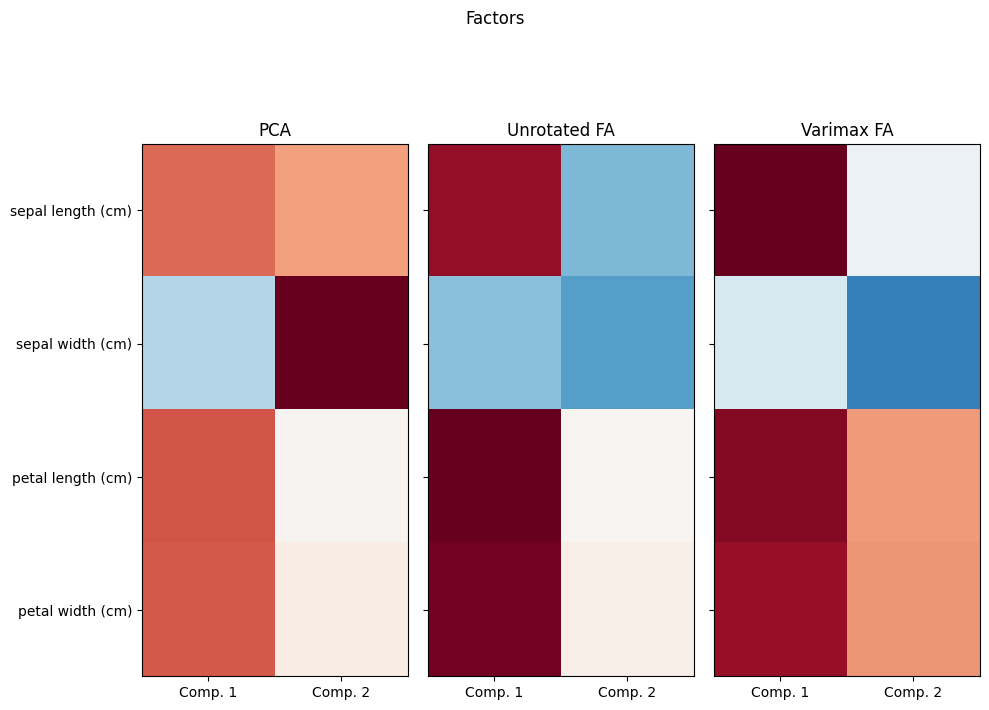

In [4]:
n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8), sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    ax.set_yticklabels(feature_names)
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()